# Классификация поступления (Admission) с деревом решений
 1) Загружаем и готовим данные
 2) Обучаем полное дерево и мелкое дерево
 3) Визуализируем и выводим accuracy
 4) Строим разделение по паре признаков GRE vs TOEFL


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import random

data = pd.read_csv('Admission_Predict.csv', index_col=0)
# убираем лишние пробелы в заголовках
data.columns = data.columns.str.strip()
print("Columns after strip:", data.columns.tolist())

Columns after strip: ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']


In [5]:
# находим колонку шанса поступления
chance_col = [c for c in data.columns if 'Chance of Admit' in c][0]
print("Using column:", chance_col)
print("Sample data:\n", data.head(), "\n")

Using column: Chance of Admit
Sample data:
             GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
Serial No.                                                              
1                 337          118                  4  4.5  4.5  9.65   
2                 324          107                  4  4.0  4.5  8.87   
3                 316          104                  3  3.0  3.5  8.00   
4                 322          110                  3  3.5  2.5  8.67   
5                 314          103                  2  2.0  3.0  8.21   

            Research  Chance of Admit  
Serial No.                             
1                  1             0.92  
2                  1             0.76  
3                  1             0.72  
4                  1             0.80  
5                  0             0.65   



In [6]:
# создаём метку
data['Admitted'] = data[chance_col] >= 0.75
print("Admitted distribution:\n", data['Admitted'].value_counts(), "\n")

# удаляем исходный столбец шанса
data = data.drop(columns=[chance_col])
features = data.drop(columns='Admitted')
labels   = data['Admitted']

Admitted distribution:
 Admitted
False    220
True     180
Name: count, dtype: int64 



Full tree accuracy: 1.000


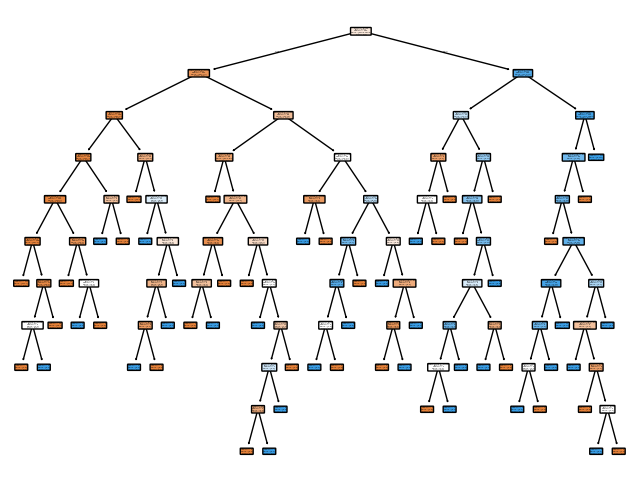

In [7]:
# полное дерево
dt_full = DecisionTreeClassifier(random_state=0)
dt_full.fit(features, labels)
print(f"Full tree accuracy: {dt_full.score(features, labels):.3f}")
utils.show_tree(dt_full)

Small tree accuracy: 0.885


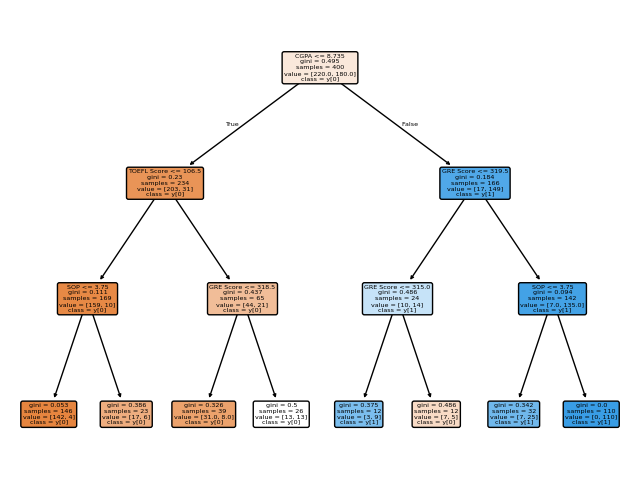

In [8]:
# малое дерево
dt_small = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10, random_state=0)
dt_small.fit(features, labels)
print(f"Small tree accuracy: {dt_small.score(features, labels):.3f}")
utils.show_tree(dt_small)

GRE/TOEFL sample:
             GRE Score  TOEFL Score
Serial No.                        
1                 337          118
2                 324          107
3                 316          104
4                 322          110
5                 314          103 Serial No.
1     True
2     True
3    False
4     True
5    False
Name: Admitted, dtype: bool 

Exam-tree accuracy: 0.863


/home/dizel/Документы/GitHub/DeepLearning/MachineLearning/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


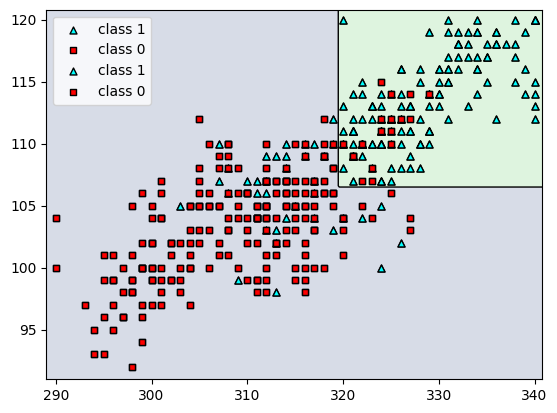

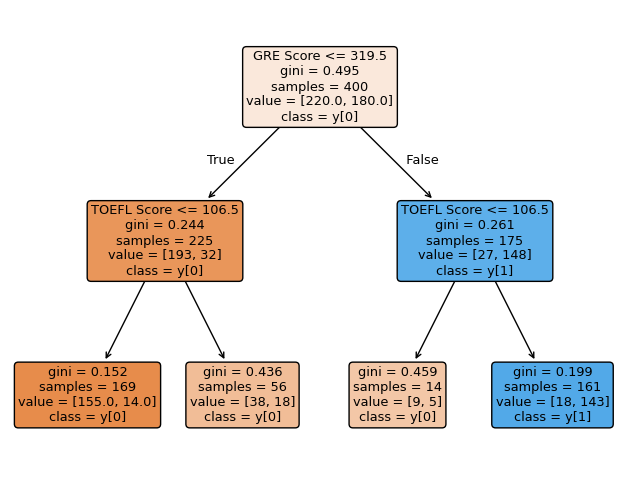

In [10]:

# разделение по GRE Score vs TOEFL Score
exams = features[['GRE Score','TOEFL Score']]
print("GRE/TOEFL sample:\n", exams.head(), labels.head(), "\n")
utils.plot_points(exams, labels, size=25)
dt_exams = DecisionTreeClassifier(max_depth=2, random_state=0)
dt_exams.fit(exams, labels)
print(f"Exam-tree accuracy: {dt_exams.score(exams, labels):.3f}")
utils.plot_model(exams, labels, dt_exams, size=25)
utils.show_tree(dt_exams)

# Классификация мобильных приложений
 1) One‑hot кодирование → многоклассовая классификация
 2) Классификация на “сыром” признаке Age+Platform


In [11]:
random.seed(0)
app_df = pd.DataFrame({
    'Platform': ['iPhone','iPhone','Android','iPhone','Android','Android'],
    'Age':      [15,25,32,35,12,14],
    'App':      ['Atom Count','Check Mate Mate','Beehive Finder','Check Mate Mate','Atom Count','Atom Count']
})
print("Original app_df:\n", app_df, "\n")

Original app_df:
   Platform  Age              App
0   iPhone   15       Atom Count
1   iPhone   25  Check Mate Mate
2  Android   32   Beehive Finder
3   iPhone   35  Check Mate Mate
4  Android   12       Atom Count
5  Android   14       Atom Count 



One-hot encoded:
    Platform_iPhone  Platform_Android  Age_Young  Age_Adult  App_Atom_Count  \
0                1                 0          1          0               1   
1                1                 0          0          1               0   
2                0                 1          0          1               0   
3                1                 0          0          1               0   
4                0                 1          1          0               1   
5                0                 1          1          0               1   

   App_Beehive_Finder  App_Check_Mate_Mate  
0                   0                    0  
1                   0                    1  
2                   1                    0  
3                   0                    1  
4                   0                    0  
5                   0                    0   

One-hot multiclass score: 1.000


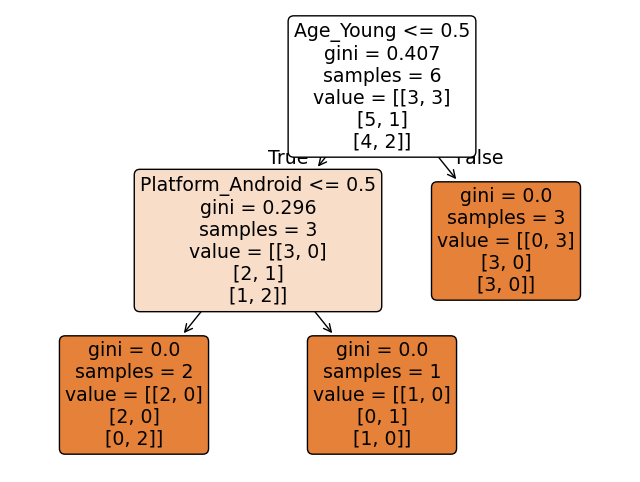

In [12]:
# --- One‑hot multiclass ---
app_oh = pd.DataFrame({
    'Platform_iPhone':[1,1,0,1,0,0],
    'Platform_Android':[0,0,1,0,1,1],
    'Age_Young':       [1,0,0,0,1,1],
    'Age_Adult':       [0,1,1,1,0,0],
    'App_Atom_Count':  [1,0,0,0,1,1],
    'App_Beehive_Finder':[0,0,1,0,0,0],
    'App_Check_Mate_Mate':[0,1,0,1,0,0]
})
print("One-hot encoded:\n", app_oh, "\n")
X_oh = app_oh[['Platform_iPhone','Platform_Android','Age_Adult','Age_Young']]
y_oh = app_oh[['App_Atom_Count','App_Beehive_Finder','App_Check_Mate_Mate']]
dt_multi = DecisionTreeClassifier(random_state=0)
dt_multi.fit(X_oh, y_oh)
print(f"One-hot multiclass score: {dt_multi.score(X_oh, y_oh):.3f}")
utils.show_tree(dt_multi)

Raw features & labels:
    Age  Platform_iPhone  Platform_Android
0   15                1                 0
1   25                1                 0
2   32                0                 1
3   35                1                 0
4   12                0                 1
5   14                0                 1 
 0         Atom Count
1    Check Mate Mate
2     Beehive Finder
3    Check Mate Mate
4         Atom Count
5         Atom Count
Name: App, dtype: object 

Raw features score: 1.000


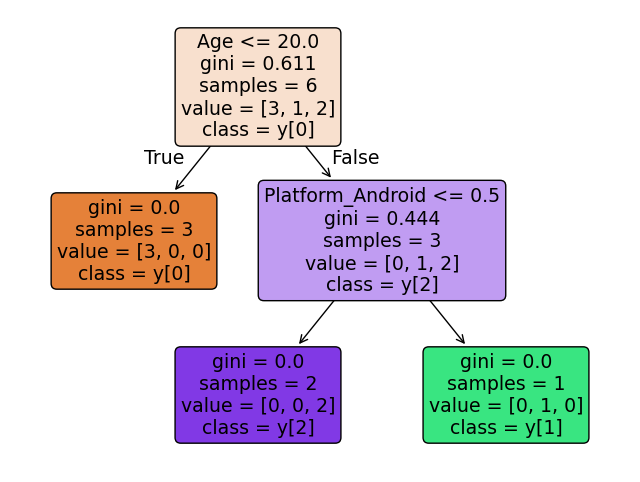

In [13]:
# --- Raw features classification ---
X2 = pd.DataFrame({
    'Age': app_df['Age'],
    'Platform_iPhone': (app_df['Platform']=='iPhone').astype(int),
    'Platform_Android': (app_df['Platform']=='Android').astype(int)
})
y2 = app_df['App']
print("Raw features & labels:\n", X2, "\n", y2, "\n")
dt2 = DecisionTreeClassifier(random_state=0)
dt2.fit(X2, y2)
print(f"Raw features score: {dt2.score(X2, y2):.3f}")
utils.show_tree(dt2)

# Регрессия деревом решений и ручной TSE 
 1) Synthetic Age→Days data
 2) DecisionTreeRegressor max_depth=2
 3) Визуализация дерева и линии регрессии
 4) Ручной расчет Total Squared Error (TSE) для split


Regression data: [([10], 7), ([20], 5), ([30], 7), ([40], 1), ([50], 2), ([60], 1), ([70], 5), ([80], 4)] 



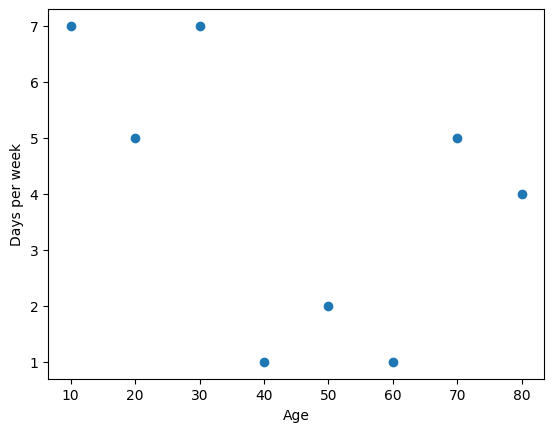

In [14]:
features_reg = [[10],[20],[30],[40],[50],[60],[70],[80]]
labels_reg   = [7,5,7,1,2,1,5,4]
print("Regression data:", list(zip(features_reg, labels_reg)), "\n")
plt.scatter(features_reg, labels_reg)
plt.xlabel('Age'); plt.ylabel('Days per week'); plt.show()

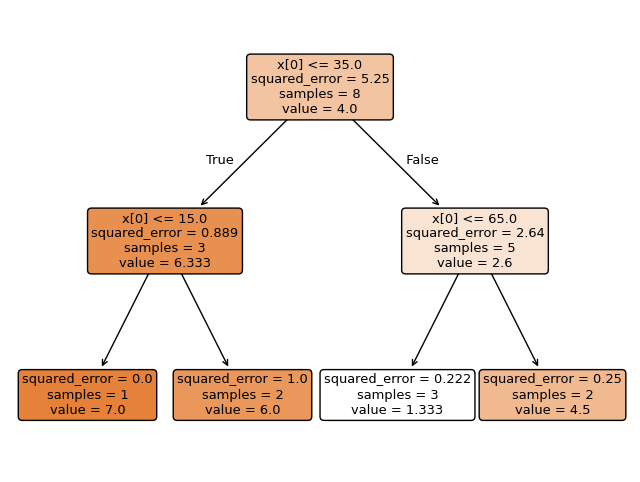

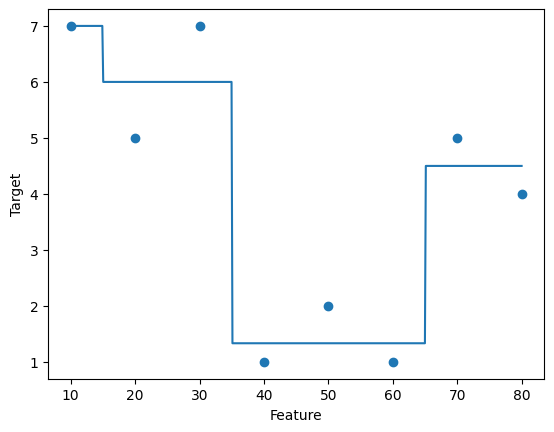

In [15]:
dr = DecisionTreeRegressor(max_depth=2, random_state=0)
dr.fit(features_reg, labels_reg)
utils.show_tree(dr)
utils.plot_regression_line(dr, features_reg, labels_reg)

In [16]:
y_arr = np.array(labels_reg)
print("Manual TSE splits:")
for i in range(len(y_arr)+1):
    left, right = y_arr[:i], y_arr[i:]
    if left.size and right.size:
        tse = ((left-left.mean())**2).sum() + ((right-right.mean())**2).sum()
        tse /= len(y_arr)
        print(f" Split {i}: TSE={tse:.3f}")
print(f" Overall mean: {y_arr.mean():.3f}")

Manual TSE splits:
 Split 1: TSE=3.964
 Split 2: TSE=3.917
 Split 3: TSE=1.983
 Split 4: TSE=4.250
 Split 5: TSE=4.983
 Split 6: TSE=5.167
 Split 7: TSE=5.250
 Overall mean: 4.000


# Ручной Gini vs Entropy 
 1) counts, gini, entropy definitions
 2) Weighted metrics for all possible splits


In [17]:

def counts(elements):
    freq = {}
    for e in elements:
        freq[e] = freq.get(e,0) + 1
    return list(freq.values())

def gini(elements):
    cts = counts(elements)
    n = sum(cts)
    return 1 - sum((c/n)**2 for c in cts) if n>0 else 0

def entropy(elements):
    cts = counts(elements)
    n = sum(cts)
    if n==0: return 0
    props = np.array(cts)/n
    return -np.sum(props * np.log2(props))

elems = ['A','A','A','C','B','C']
print(f"Overall Gini: {gini(elems):.3f}, Entropy: {entropy(elems):.3f}")
for i in range(len(elems)):
    left, right = elems[:i], elems[i:]
    wg = (len(left)*gini(left) + len(right)*gini(right))/len(elems)
    we = (len(left)*entropy(left) + len(right)*entropy(right))/len(elems)
    print(f" Split {i}: Weighted Gini={wg:.3f}, Weighted Entropy={we:.3f}")

Overall Gini: 0.611, Entropy: 1.459
 Split 0: Weighted Gini=0.611, Weighted Entropy=1.459
 Split 1: Weighted Gini=0.533, Weighted Entropy=1.268
 Split 2: Weighted Gini=0.417, Weighted Entropy=1.000
 Split 3: Weighted Gini=0.222, Weighted Entropy=0.459
 Split 4: Weighted Gini=0.417, Weighted Entropy=0.874
 Split 5: Weighted Gini=0.467, Weighted Entropy=1.142
